In [12]:
# Libraries
import pandas as pd, seaborn as sns, pingouin as pg, matplotlib.pyplot as plt, plotly.express as px

# Credit Risk Analysis - Exloratory analysis<br>

The objective of this analysis is to understand which are the factors that are effecting the probability of default of a given company, using initially only the data of the explanatory variables of 2019 to predict the ratings of 2020 (so as to compare the forecasts with the true values of the rating). <br>
Then it can be added new explanatory variables 'delayed' eg leverage to 2018, 2017, etc. <br>
In this specific notebook the modified dataset will be imported and some exploratory analysis will be applied.

**Financial Data Science (UniPV) - Prof. Paolo Giudici** <br>
*Computer Engineering (Data Science) - A.Y. 2022/23* <br>
*Francesco Amato, 507767*

In [2]:
# Load the datatset
companies_df = pd.read_csv('../dataset/cleaned-credit-risk.tar.gz', compression='gzip')
companies_df

Company name  Turnover.2020  \
0                                        LENDLEASE S.R.L.          29458   
1       PRICEWATERHOUSECOOPERS BUSINESS SERVICES SRL (...          16731   
2                                            EVISO S.P.A.          48568   
3                                    CASA SERVICE MACHINE          47999   
4                                           PANFERTIL SPA          45948   
...                                                   ...            ...   
121003                               ASTOR VILLAGE S.R.L.           3161   
121004                                ODONE & SLOA S.R.L.           3161   
121005                     GARRIDO MURO SOCIEDAD LIMITADA           3161   
121006                       CENTRO INGROSSO JOLLY S.R.L.           3161   
121007                                 SALONES COMATEL SL           3161   

        Turnover.2019  Turnover.2018  Turnover.2017  Turnover.2016  \
0               16716           9612           8097         7941.0   
1               16403          16843          12241         9252.0   
2               43039          34302          25791        19760.0   
3               43484          43043          41682        51267.0   
4               47336          45626          48222        57074.0   
...               ...            ...            ...            ...   
121003           4635           4742           4499         4277.0   
121004           2562           2559           2334         3692.0   
121005           3146           2989           3101         2746.0   
121006           2519           2290           2244         1761.0   
121007           4514           4435           4231         3908.0   

        Turnover.2015  EBIT.2020  EBIT.2019  EBIT.2018  ...  ROE.2018  \
0              5600.0    -1556.0    -4540.0      623.0  ...      8.24   
1              9515.0     1838.0      841.0     2738.0  ...     61.42   
2              6941.0     1661.0     1464.0      976.0  ...     57.52   
3             52584.0      416.0      255.0     -855.0  ...    -17.24   
4             62263.0       44.0      713.0     -672.0  ...     -5.17   
...               ...        ...        ...        ...  ...       ...   
121003         3650.0      985.0     1818.0     1790.0  ...     11.01   
121004         2537.0       60.0      101.0       27.0  ...      0.62   
121005         3154.0      260.0       13.0       48.0  ...      1.88   
121006         1821.0       74.0       48.0       60.0  ...      3.74   
121007         2051.0      194.0      733.0      830.0  ...     15.59   

        ROE.2017  ROE.2016  ROE.2015  TAsset.2020  TAsset.2019  TAsset.2018  \
0        -146.65     60.76   -471.72        49263        28268        15455   
1         -55.57   -127.29    -87.13        16550        16887        16468   
2          42.73     20.34     44.62        13500         9620         7371   
3           0.71      2.89      6.45        24978        25032        25729   
4          -6.74      0.03     -8.19        36823        34659        36205   
...          ...       ...       ...          ...          ...          ...   
121003      8.44      7.83      6.31        15935        15664        14438   
121004     -4.80     -7.85    -12.84         2487         2317         2351   
121005      3.10      2.90      5.62         2547         1855         1692   
121006      3.54     18.85      0.58         2961         2552         2604   
121007     25.60     40.55     -9.98         3576         4259         4747   

        TAsset.2017  TAsset.2016 TAsset.2015  
0             15992      13597.0     11659.0  
1             10773       6697.0      8933.0  
2              5432       4170.0      2862.0  
3             21632      25403.0     24941.0  
4             38423      41847.0     41323.0  
...             ...          ...         ...  
121003        13054      12243.0     11695.0  
121004         2521       2797.0      3152.0  
121005         1843       1773.0      1699

### Correlations and partial correlations

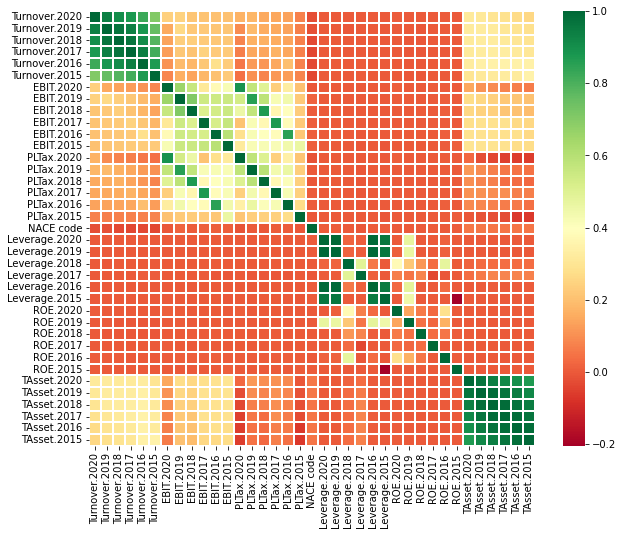

In [3]:
# Pearson correlation
plt.figure(figsize=(10, 8))
sns.heatmap(companies_df.corr(), cmap='RdYlGn', linewidths = 0.1);

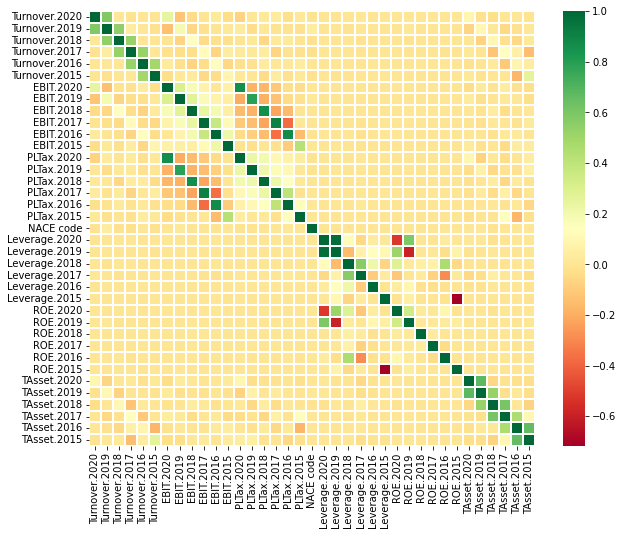

In [4]:
# Partial correlation
plt.figure(figsize=(10, 8))
sns.heatmap(pg.pcorr(companies_df), cmap='RdYlGn', linewidths = 0.1);

### Visualize companies by coordinates
#### Add to each row (representing a different company) the coordinate of the city

In [5]:
countries_df = pd.read_csv('../dataset/countries.tar.gz', compression='gzip')[['name', 'alpha-2']]
cities_df = pd.read_csv('../dataset/world-cities.tar.gz', low_memory=False, compression='gzip')[['City', 'Country', 'Latitude', 'Longitude']]

In [6]:
countries_df['alpha-2'] = countries_df['alpha-2'].str.lower()
countries_df = countries_df.rename(columns={'name':'Country'})
countries_df

Country alpha-2
0          Afghanistan      af
1        Åland Islands      ax
2              Albania      al
3              Algeria      dz
4       American Samoa      as
..                 ...     ...
244  Wallis and Futuna      wf
245     Western Sahara      eh
246              Yemen      ye
247             Zambia      zm
248           Zimbabwe      zw

[249 rows x 2 columns]

In [7]:
cities_df['City'] = cities_df['City'].str.capitalize()
cities_df = cities_df.rename(columns={'Country':'alpha-2'})
cities_df

City alpha-2   Latitude  Longitude
0              Aixas      ad  42.483333   1.466667
1         Aixirivali      ad  42.466667   1.500000
2         Aixirivall      ad  42.466667   1.500000
3          Aixirvall      ad  42.466667   1.500000
4           Aixovall      ad  42.466667   1.483333
...              ...     ...        ...        ...
3173953   Zimre park      zw -17.866111  31.213611
3173954  Ziyakamanas      zw -18.216667  27.950000
3173955   Zizalisari      zw -17.758889  31.010556
3173956      Zuzumba      zw -20.033333  27.933333
3173957   Zvishavane      zw -20.333333  30.033333

[3173958 rows x 4 columns]

In [8]:
modified_companies_df = companies_df.merge(countries_df, on='Country')
modified_companies_df = modified_companies_df.rename(columns={'Region':'City'})
modified_companies_df = modified_companies_df.merge(cities_df, on=['City', 'alpha-2'])
del modified_companies_df['alpha-2']

Company name  Turnover.2020  \
0                                        LENDLEASE S.R.L.          29458   
1                                        LENDLEASE S.R.L.          29458   
2       PRICEWATERHOUSECOOPERS BUSINESS SERVICES SRL (...          16731   
3       PRICEWATERHOUSECOOPERS BUSINESS SERVICES SRL (...          16731   
4                                     PERONI POMPE S.P.A.          49787   
...                                                   ...            ...   
110226          FISHERMAN'S PARTNER ANGLER-FACHMARKT GMBH           5109   
110227          FISHERMAN'S PARTNER ANGLER-FACHMARKT GMBH           5109   
110228          FISHERMAN'S PARTNER ANGLER-FACHMARKT GMBH           5109   
110229                WOHNUNGSBAUGENOSSENSCHAFT UELZEN EG           4065   
110230                   HC GATEWAY GARDENS GMBH & CO. KG           3529   

        Turnover.2019  Turnover.2018  Turnover.2017  Turnover.2016  \
0               16716           9612           8097         7941.0   
1               16716           9612           8097         7941.0   
2               16403          16843          12241         9252.0   
3               16403          16843          12241         9252.0   
4               44802          48281          40481        54356.0   
...               ...            ...            ...            ...   
110226           5175           4984           5063         5143.0   
110227           5175           4984           5063         5143.0   
110228           5175           4984           5063         5143.0   
110229           3905           3835           3730         3600.0   
110230           3371           3696           4760         3760.0   

        Turnover.2015  EBIT.2020  EBIT.2019  EBIT.2018  ...  ROE.2016  \
0              5600.0    -1556.0    -4540.0      623.0  ...     60.76   
1              5600.0    -1556.0    -4540.0      623.0  ...     60.76   
2              9515.0     1838.0      841.0     2738.0  ...   -127.29   
3              9515.0     1838.0      841.0     2738.0  ...   -127.29   
4             54220.0    12215.0    10331.0    11524.0  ...     18.09   
...               ...        ...        ...        ...  ...       ...   
110226         5625.0      370.0      430.0      423.0  ...      7.33   
110227         5625.0      370.0      430.0      423.0  ...      7.33   
110228         5625.0      370.0      430.0      423.0  ...      7.33   
110229         3513.0      392.0      268.0      623.0  ...      0.97   
110230         3702.0     -224.0      697.0     -142.0  ...   -904.42   

        ROE.2015  TAsset.2020  TAsset.2019  TAsset.2018  TAsset.2017  \
0        -471.72        49263        28268        15455        15992   
1        -471.72        49263        28268        15455        15992   
2         -87.13        16550        16887        16468        10773   
3         -87.13        16550        16887        16468        10773   
4          21.88        91333        77309        76347        65044   
...          ...          ...          ...          ...          ...   
110226      6.87         6788         7443         7766         7168   
110227      6.87         6788         7443         7766         7168   
110228      6.87         6788         7443         7766         7168   
110229      1.58        19343        19322        18920        17770   
110230    -92.56        45338        45631        50842        49551   

        TAsset.2016  TAsset.2015   Latitude  Longitude  
0           13597.0      11659.0  45.466667   9.200000  
1           13597.0      11659.0  42.783333  12.600000  
2            6697.0       8933.0  45.466667   9.200000  
3            6697.0       8933.0  42.783333  12.600000  
4           69585.0      72071.0  45.466667   9.200000  
...             ...          ...        ...        ...  
110226       6587.0       6731.0  49.615556   8.994167  
110227       6587.0       6731.0  50.366667  12.016667  
110228       6587.0       6731.0  50

In [28]:
fig = px.density_mapbox(modified_companies_df, lat='Latitude', lon='Longitude', radius=1.5, center=dict(lat=46.818188, lon=8.227512), zoom=3, mapbox_style='open-street-map', hover_name='Company name')
fig.show()